In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')

df.head()

,make,model,bodyType,seats,numOfOwners,fuelType,horsePower,driveTrain,transmission,mileage,mpgCity,mpgHighway,evRange,evMpgeCity,evMpgeHighway,hasReportedAccident,price,age
0,Kia,Soul,Wagon,5,1,Gas,147.0,FWD,Auto,12599,27.0,33.0,0.0,0.0,0.0,False,18990,1
1,Nissan,Titan Crew Cab,Truck,5,2,Gas,400.0,4WD,Auto,44123,15.0,21.0,0.0,0.0,0.0,False,38990,5
2,Volkswagen,Jetta,Sedan,5,3,Gas,115.0,FWD,Auto,72182,22.0,33.0,0.0,0.0,0.0,False,13990,10
3,Honda,Ridgeline,Truck,5,2,Gas,280.0,FWD,Auto,63205,18.0,25.0,0.0,0.0,0.0,False,27590,6
4,GMC,Terrain,SUV,5,1,Gas,175.0,AWD,Auto,19923,23.0,28.0,0.0,0.0,0.0,False,25590,1


## Most popular brands

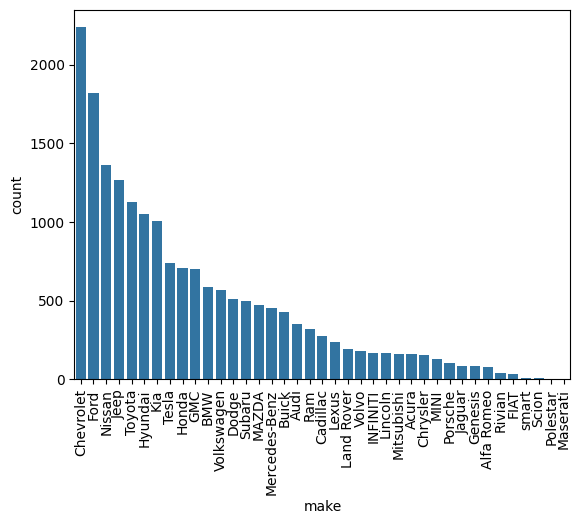

In [3]:
sns.countplot(df, x='make', order=list(df['make'].value_counts().index))
plt.xticks(rotation = 90)
plt.show()

In [28]:
# Format y-axis labels to K/M
def format_k_m(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return f'{x:.0f}'

## Price of each brand

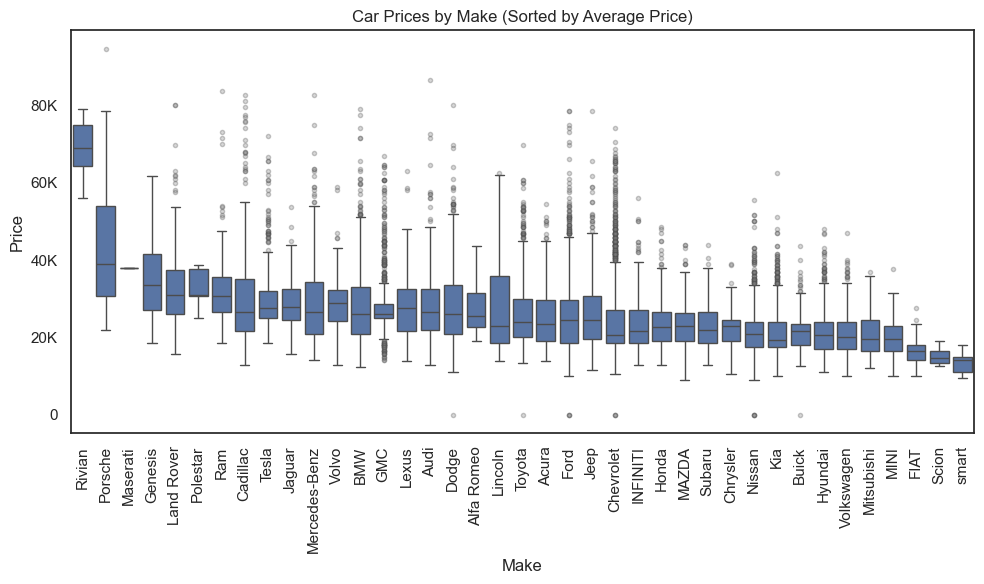

In [30]:
make_order = df.groupby('make')['price'].mean().sort_values(ascending=False).index

# Plot boxplot sorted by average price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='make', y='price', order=make_order, fliersize=2, flierprops=dict(marker='o', markersize=3, markerfacecolor='gray', alpha=0.3))  # subtle style

# Rotate x-axis labels
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_k_m))

plt.xticks(rotation=90)
plt.title("Car Prices by Make (Sorted by Average Price)")
plt.xlabel("Make")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

## Function for EDA

In [82]:
# General plotting function
def plot_box_and_count_by_column(df, column):
    # Order categories by average price
    order = df.groupby(column)['price'].mean().sort_values(ascending=False).index

    # Set up figure
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Boxplot
    sns.boxplot(
        data=df,
        x=column,
        y='price',
        order=order,
        ax=axes[0],
        fliersize=2,
        flierprops=dict(marker='o', markersize=3, markerfacecolor='gray', alpha=0.3)
    )
    axes[0].set_title(f"Price by {column}", fontsize=12)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Price")
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(format_k_m))

    # Countplot
    sns.countplot(
        data=df,
        x=column,
        order=df[column].value_counts().index,
        hue='hasReportedAccident',
        ax=axes[1]
    )
    for p in axes[1].patches:
        height = p.get_height()
        axes[1].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)
    axes[1].set_title(f"Count of {column}", fontsize=12)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Count")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    return fig

## Body type vs price

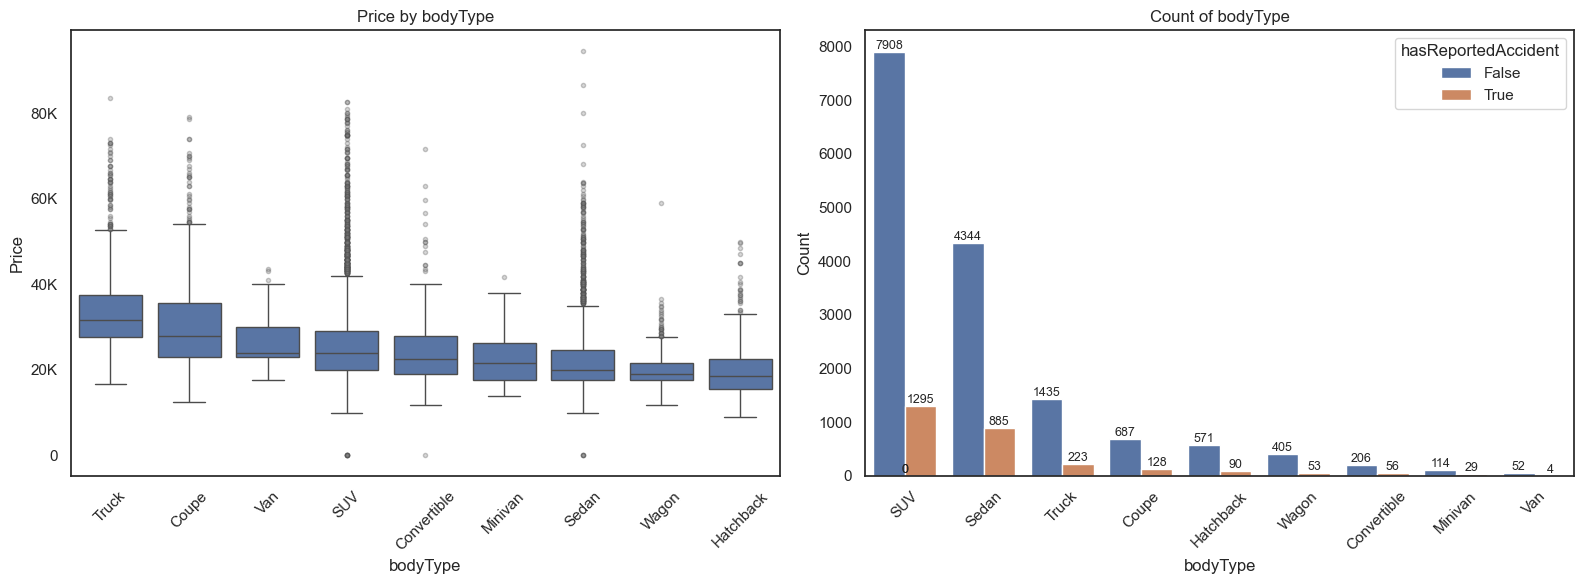

In [83]:
fig = plot_box_and_count_by_column(df, 'bodyType')
plt.show()

## Fuel Type

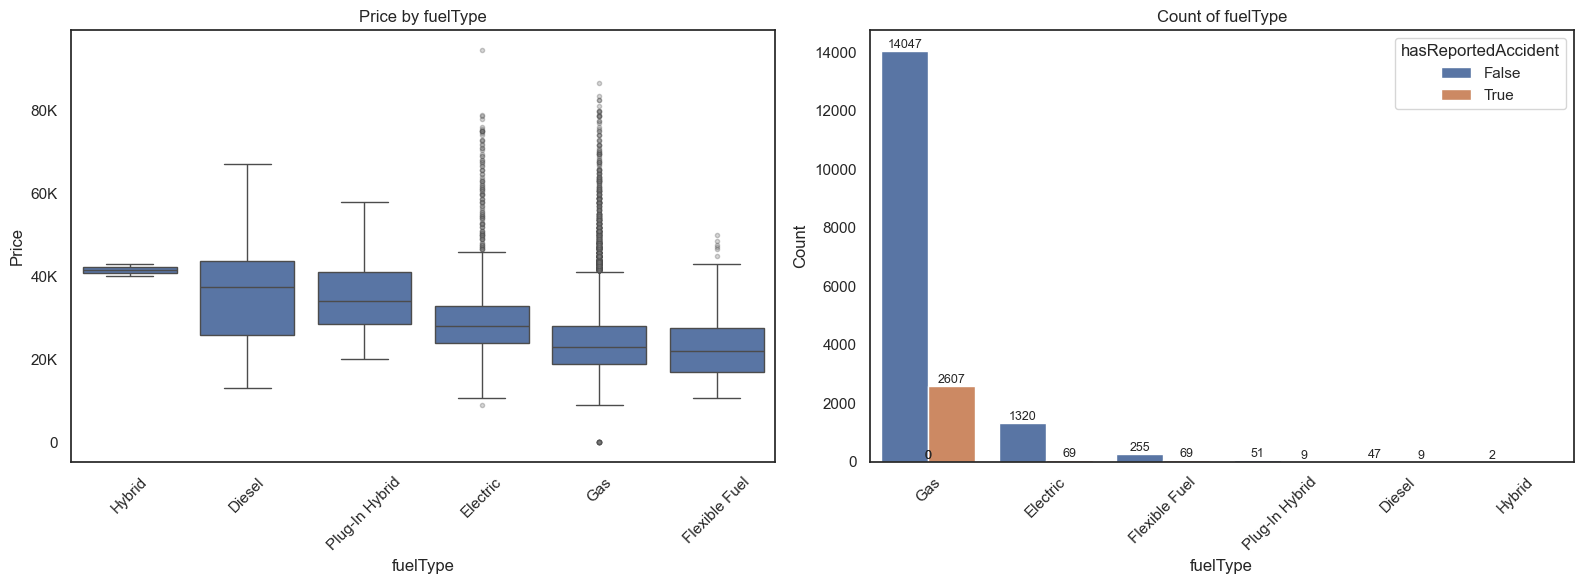

In [75]:
fig = plot_box_and_count_by_column(df, 'fuelType')
plt.show()

## Seats

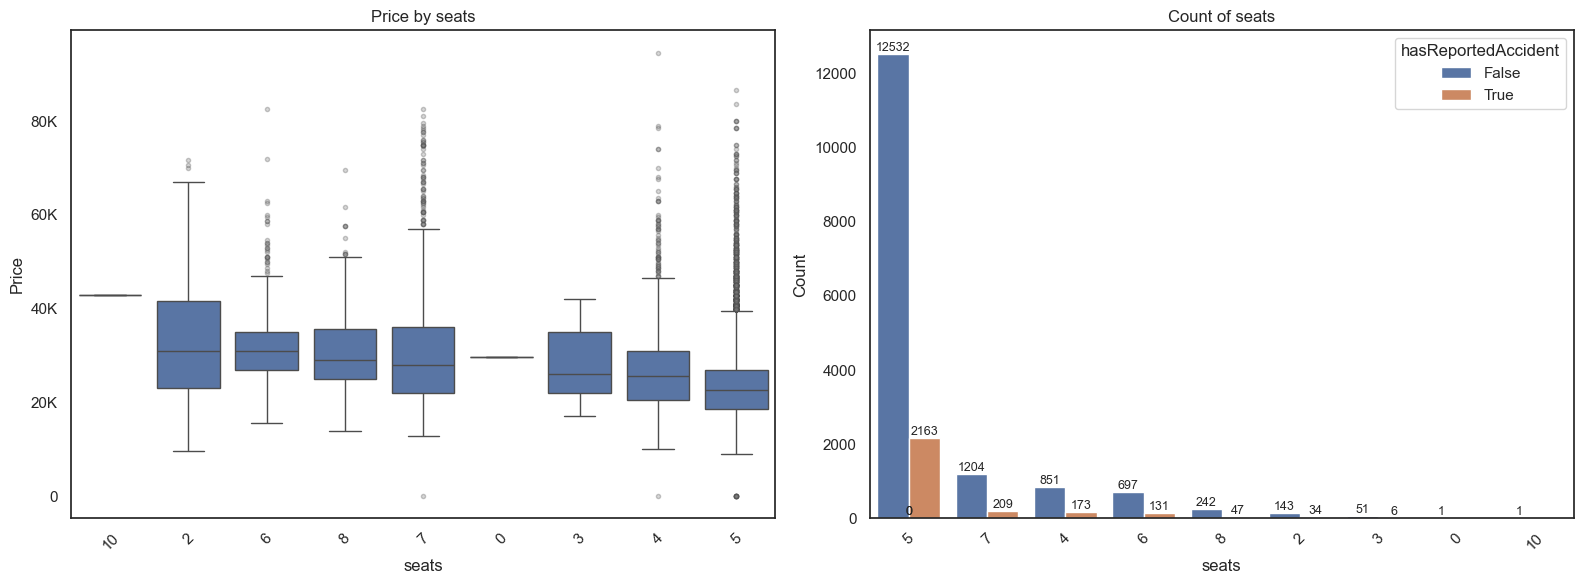

In [76]:
fig = plot_box_and_count_by_column(df, 'seats')
plt.show()

## Number of Owners

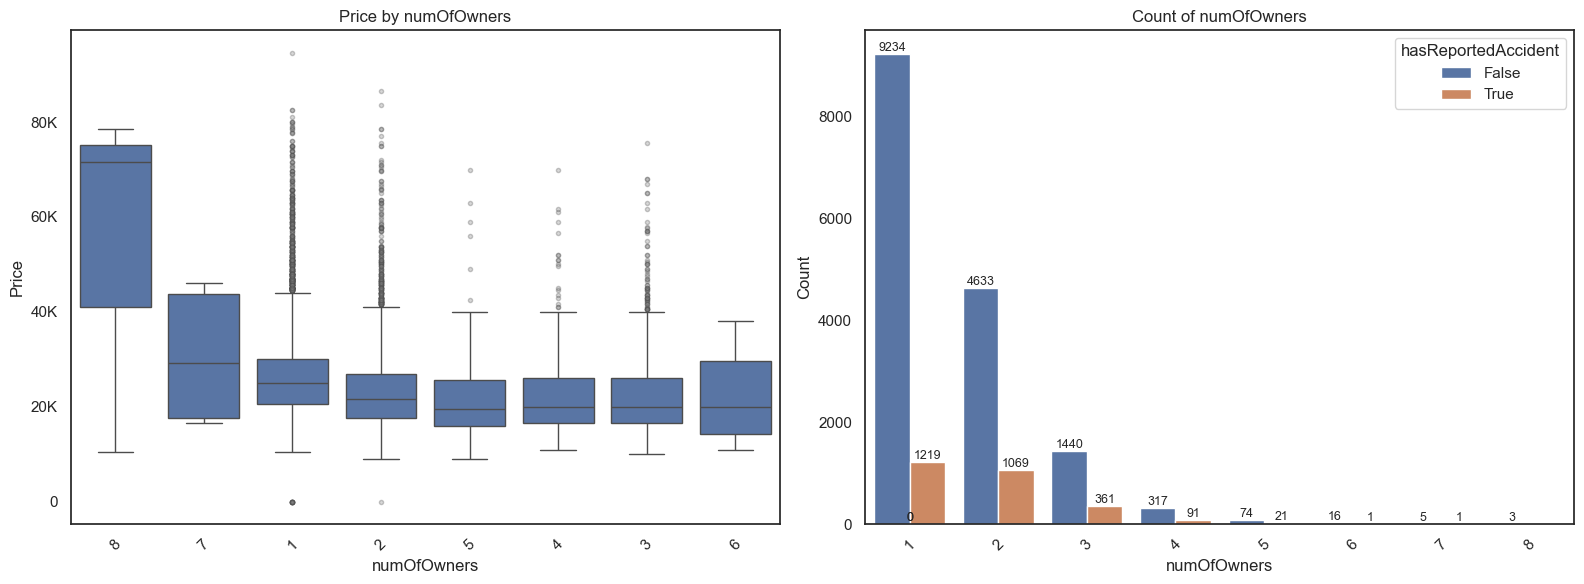

In [77]:
fig = plot_box_and_count_by_column(df, 'numOfOwners')
plt.show()

## Horse Power

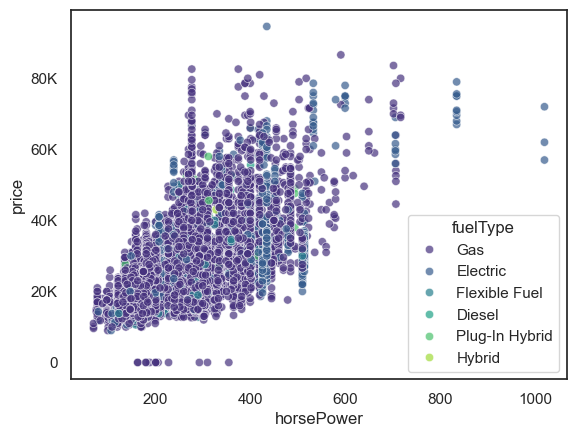

In [ ]:

sns.scatterplot(x='horsePower', y='price', data = df,
    hue='fuelType',            # variable color
    palette='viridis',         # color map
    alpha=0.7      )
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_k_m))

plt.show()

## Drive Train

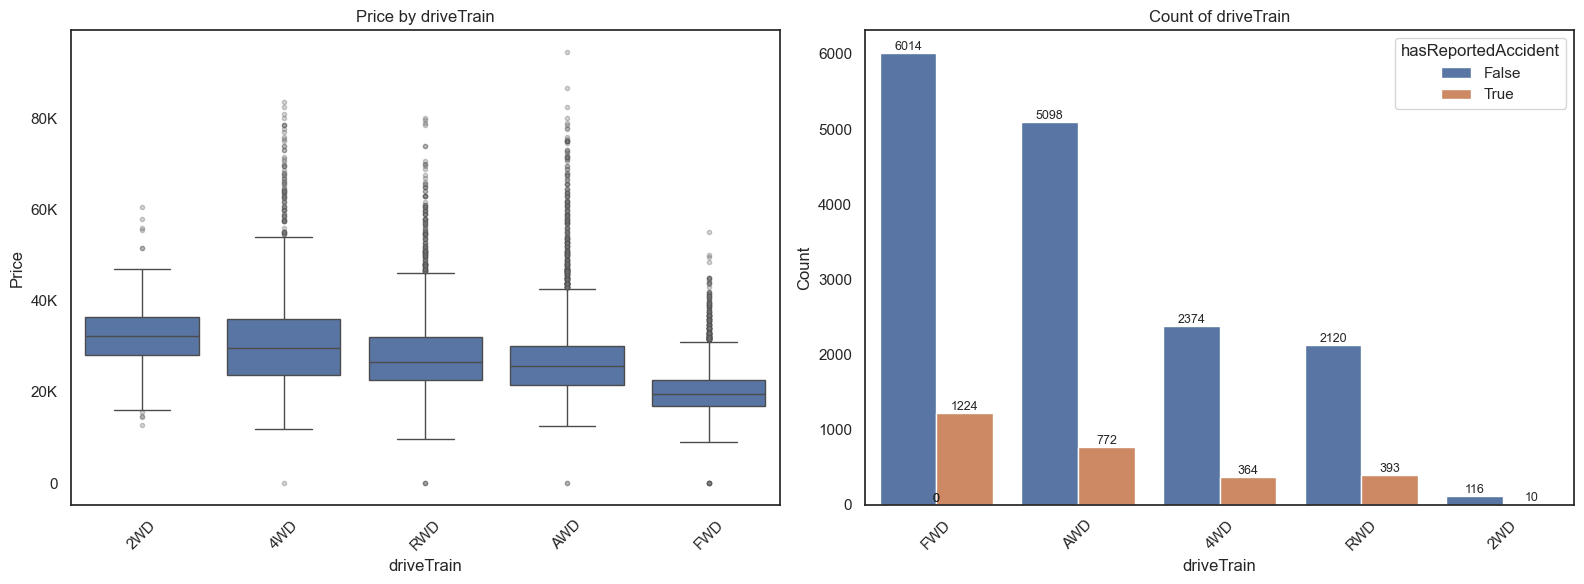

In [84]:
fig = plot_box_and_count_by_column(df, 'driveTrain')
plt.show()

## Transmission

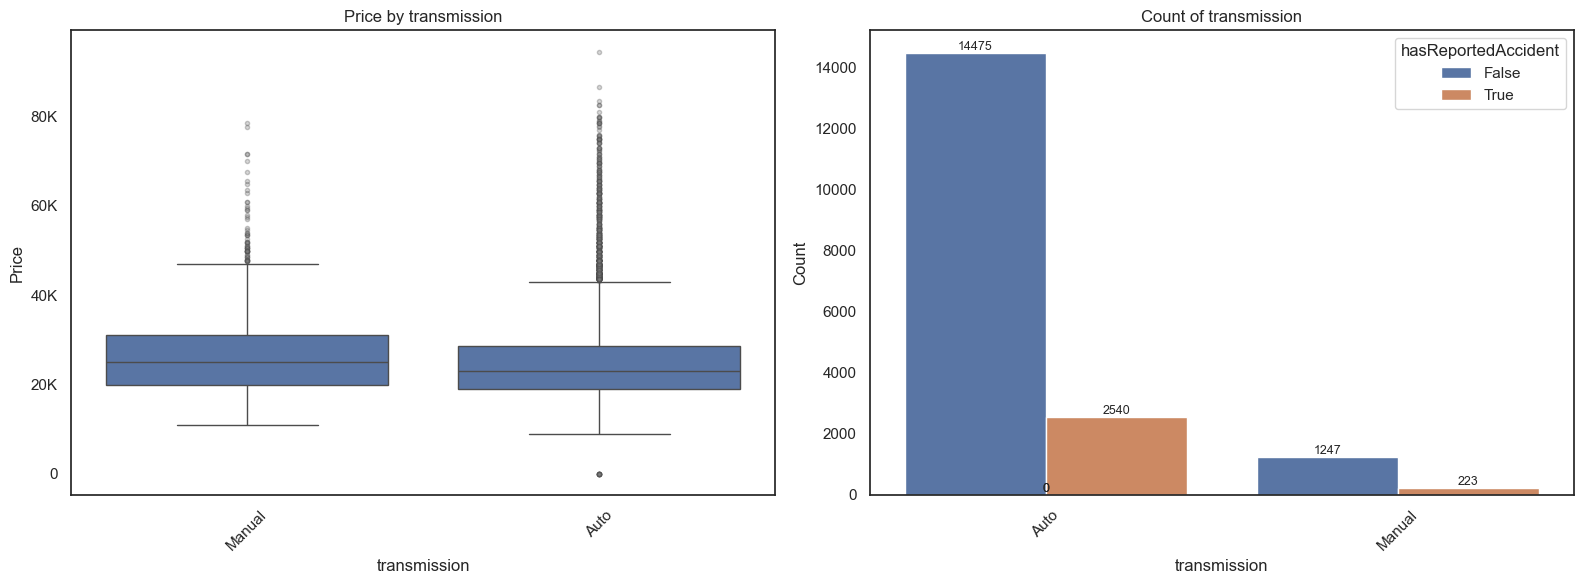

In [78]:
fig = plot_box_and_count_by_column(df, 'transmission')
plt.show()

## Miles Driven

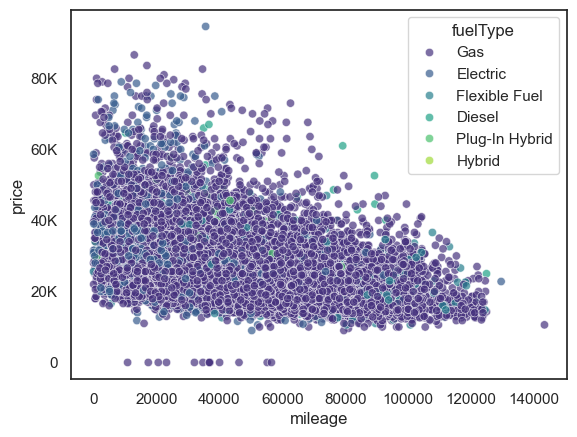

In [72]:
sns.scatterplot(x='mileage', y='price', data = df,
    hue='fuelType',            # variable color
    palette='viridis',         # color map
    alpha=0.7      )
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_k_m))

plt.show()

## Age

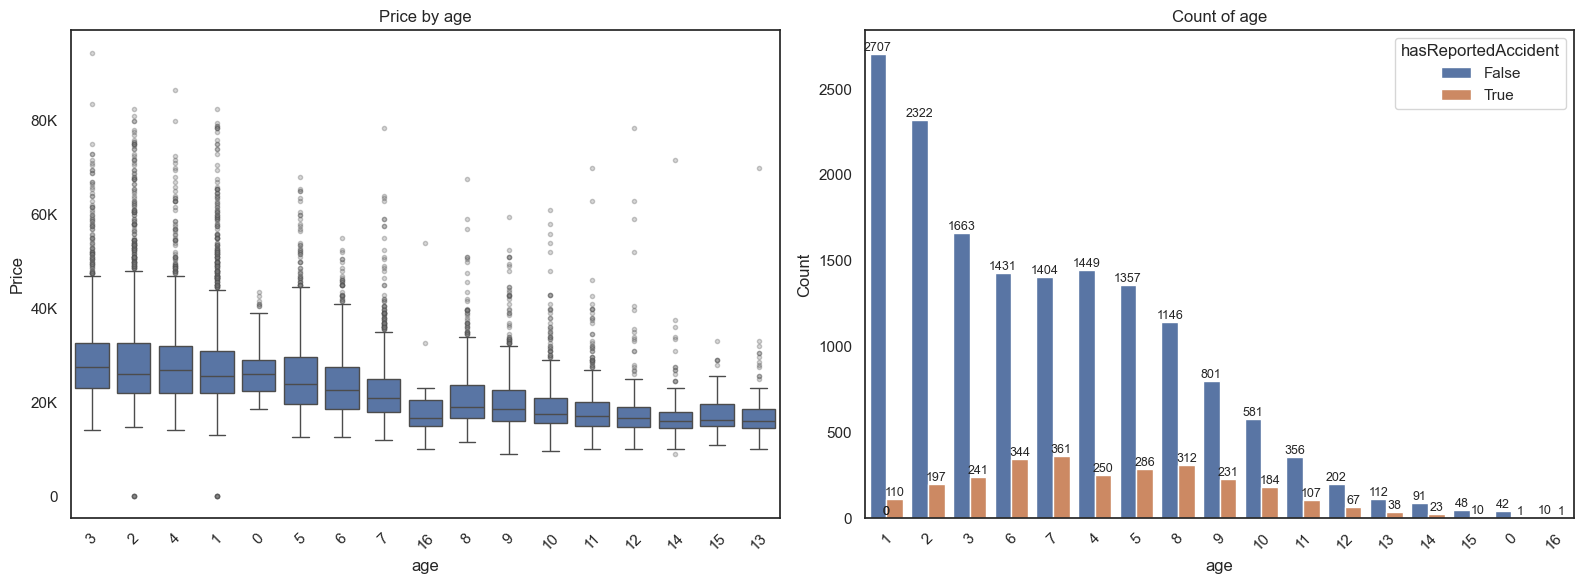

In [87]:
fig = plot_box_and_count_by_column(df, 'age')
plt.show()

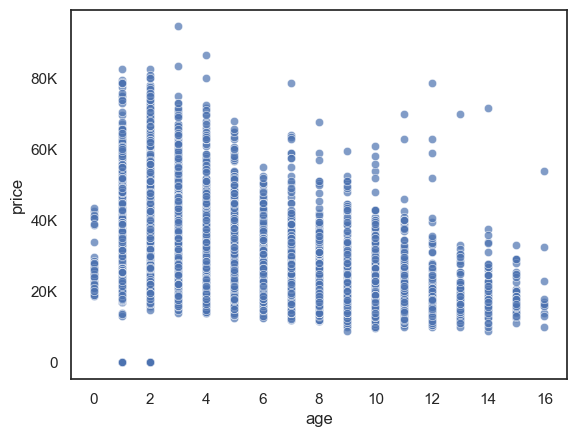

In [89]:
sns.scatterplot(x='age', y='price', data = df,
    #hue='fuelType',            # variable color
    #palette='viridis',         # color map
    alpha=0.7      )
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_k_m))

plt.show()

In [50]:
df.head()

,make,model,bodyType,seats,numOfOwners,fuelType,horsePower,driveTrain,transmission,mileage,mpgCity,mpgHighway,evRange,evMpgeCity,evMpgeHighway,hasReportedAccident,price,age
0,Kia,Soul,Wagon,5,1,Gas,147.0,FWD,Auto,12599,27.0,33.0,0.0,0.0,0.0,False,18990,1
1,Nissan,Titan Crew Cab,Truck,5,2,Gas,400.0,4WD,Auto,44123,15.0,21.0,0.0,0.0,0.0,False,38990,5
2,Volkswagen,Jetta,Sedan,5,3,Gas,115.0,FWD,Auto,72182,22.0,33.0,0.0,0.0,0.0,False,13990,10
3,Honda,Ridgeline,Truck,5,2,Gas,280.0,FWD,Auto,63205,18.0,25.0,0.0,0.0,0.0,False,27590,6
4,GMC,Terrain,SUV,5,1,Gas,175.0,AWD,Auto,19923,23.0,28.0,0.0,0.0,0.0,False,25590,1


In [90]:
df.select_dtypes(include='object').columns.tolist()

['make', 'model', 'bodyType', 'fuelType', 'driveTrain', 'transmission']

In [96]:
set(list(df.columns)) - set(['make', 'bodyType', 'fuelType', 'driveTrain', 'transmission', 'seats', 'numOfOwners', 'age'])

{'evMpgeCity',
 'evMpgeHighway',
 'evRange',
 'hasReportedAccident',
 'horsePower',
 'mileage',
 'model',
 'mpgCity',
 'mpgHighway',
 'price'}

In [97]:
df.columns

Index(['make', 'model', 'bodyType', 'seats', 'numOfOwners', 'fuelType',
       'horsePower', 'driveTrain', 'transmission', 'mileage', 'mpgCity',
       'mpgHighway', 'evRange', 'evMpgeCity', 'evMpgeHighway',
       'hasReportedAccident', 'price', 'age'],
      dtype='object')